# Assignment : Multiple Linear Regression
## Car Price Case Study

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

## Step 1: DATA READING

Let us first import NumPy and Pandas and read the CarPrice dataset

In [1]:
import numpy as np
import pandas as pd

# Importing STATS MODEL
import statsmodels.api as sm
# Importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import train-test split & Min-Max scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.shape

(205, 26)

In [4]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Step 2: DATA CLEANING & PREPARATION

In [6]:
# Checking the percentage of missing values in each column
round(cars.isnull().sum()/len(cars.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

Observation : We can see no missing values in the dataset 

In [7]:
#Checking for duplicates
print(cars.loc[cars.duplicated()])

Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]


In [8]:
# Dropping Duplicates if any
cars=cars.drop_duplicates()

In [9]:
cars.shape

(205, 26)

Observation : No duplicate values found hence the shape of the dataset remains the same after dropping duplicates.

In [10]:
#Splitting 'CarName' to get the 'CarCompany' & drop the 'CarModel' from CarName column
CarCompany = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CarCompany",CarCompany)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Checking the unique car companies present in the dataset**

In [11]:
print(cars.CarCompany.unique(), "\n")
print("The number of unique car company names is ", cars.CarCompany.nunique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo'] 

The number of unique car company names is  28


Observation : We see here some spelling mistakes in the car company names such as 
- maxda = mazda,
- Nissan = nissan,
- porsche = porcshce,
- toyota = toyouta, 
- vokswagen = volkswagen = vw

In [12]:
cars.CarCompany = cars.CarCompany.str.lower()

def replace_name(a,b):
    cars.CarCompany.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
print("The number of unique car company names now after correcting the company names is ", cars.CarCompany.nunique())

The number of unique car company names now after correcting the company names is  22


In [14]:
cars.columns

Index(['car_ID', 'symboling', 'CarCompany', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Step 2: DATA VISUALISATION & UNDERSTANDING

Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

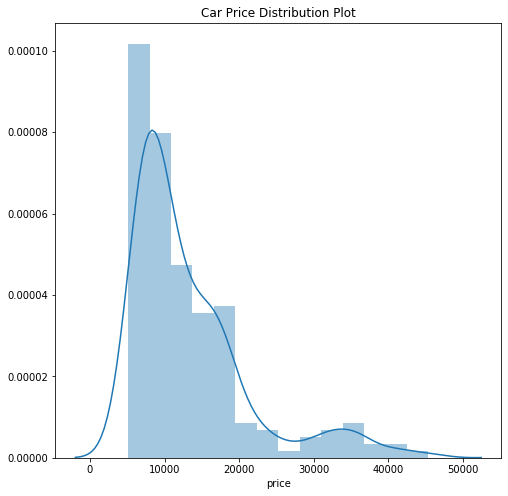

In [16]:
# Visualizing the distribution of car prices
plt.figure(figsize=(8,8))
plt.title('Car Price Distribution Plot')
sns.distplot(cars['price'])
plt.show()

Observation : Since the plot is right skewed, prices of most cars are less than 18000

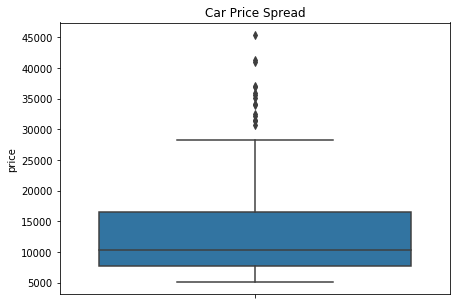

In [17]:
plt.figure(figsize=(7,5))
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)
plt.show()

In [18]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


Observation : The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

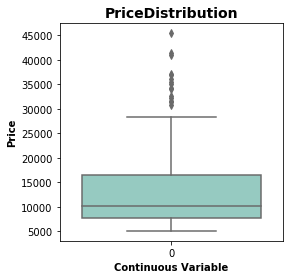

In [19]:
# Outlier Analysis of output variable - 'price'
plt.figure(figsize = [4,4])
sns.boxplot(data=cars['price'], orient="v", palette="Set3")
plt.title("PriceDistribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
plt.show()

Observation : Cars which are above 30000 can be termed as outliers.

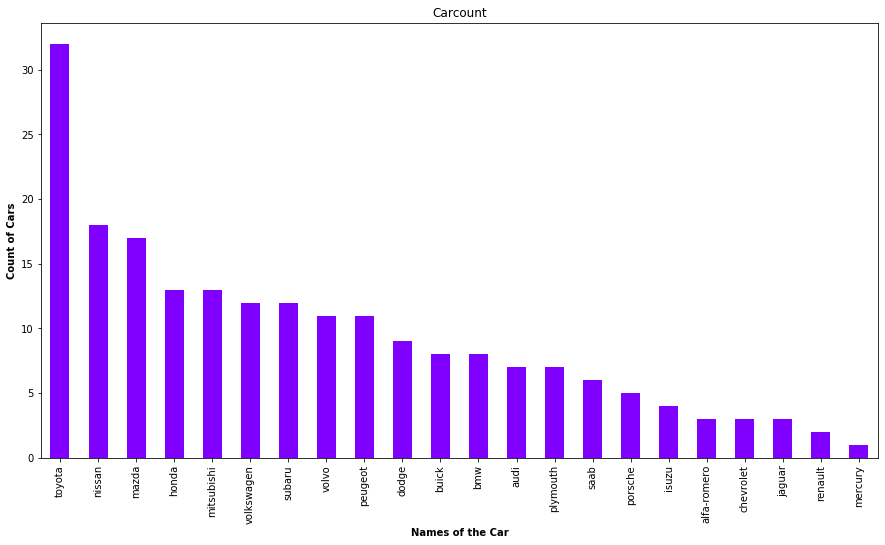

In [20]:
# Visualizing number of cars for each car name in the data set
plt.figure(figsize = [15,8])
ax=cars['CarCompany'].value_counts().plot(kind='bar',stacked=False, colormap = 'rainbow')
ax.title.set_text('Carcount')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')
plt.show()

Observation : 
    As we can see from the above plot, it seems "Toyota" is the most common car & "mercury" is the least common car

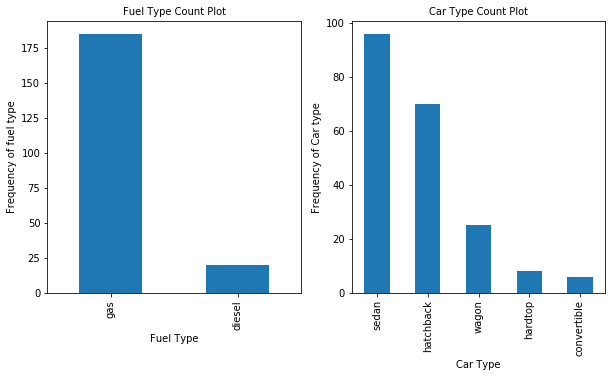

In [21]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt1 = cars.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Count Plot',fontsize=10)
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,2,2)
plt1 = cars.carbody.value_counts().plot('bar')
plt.title('Car Type Count Plot',fontsize=10)
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')
plt.show()

Observation : 
    - Number of gas fueled cars are more than diesel.
    - Sedan is the most common prefered car type.

**Visualising Numeric Variables**
Let's make a pairplot of all the numeric variables

<Figure size 2160x2880 with 0 Axes>

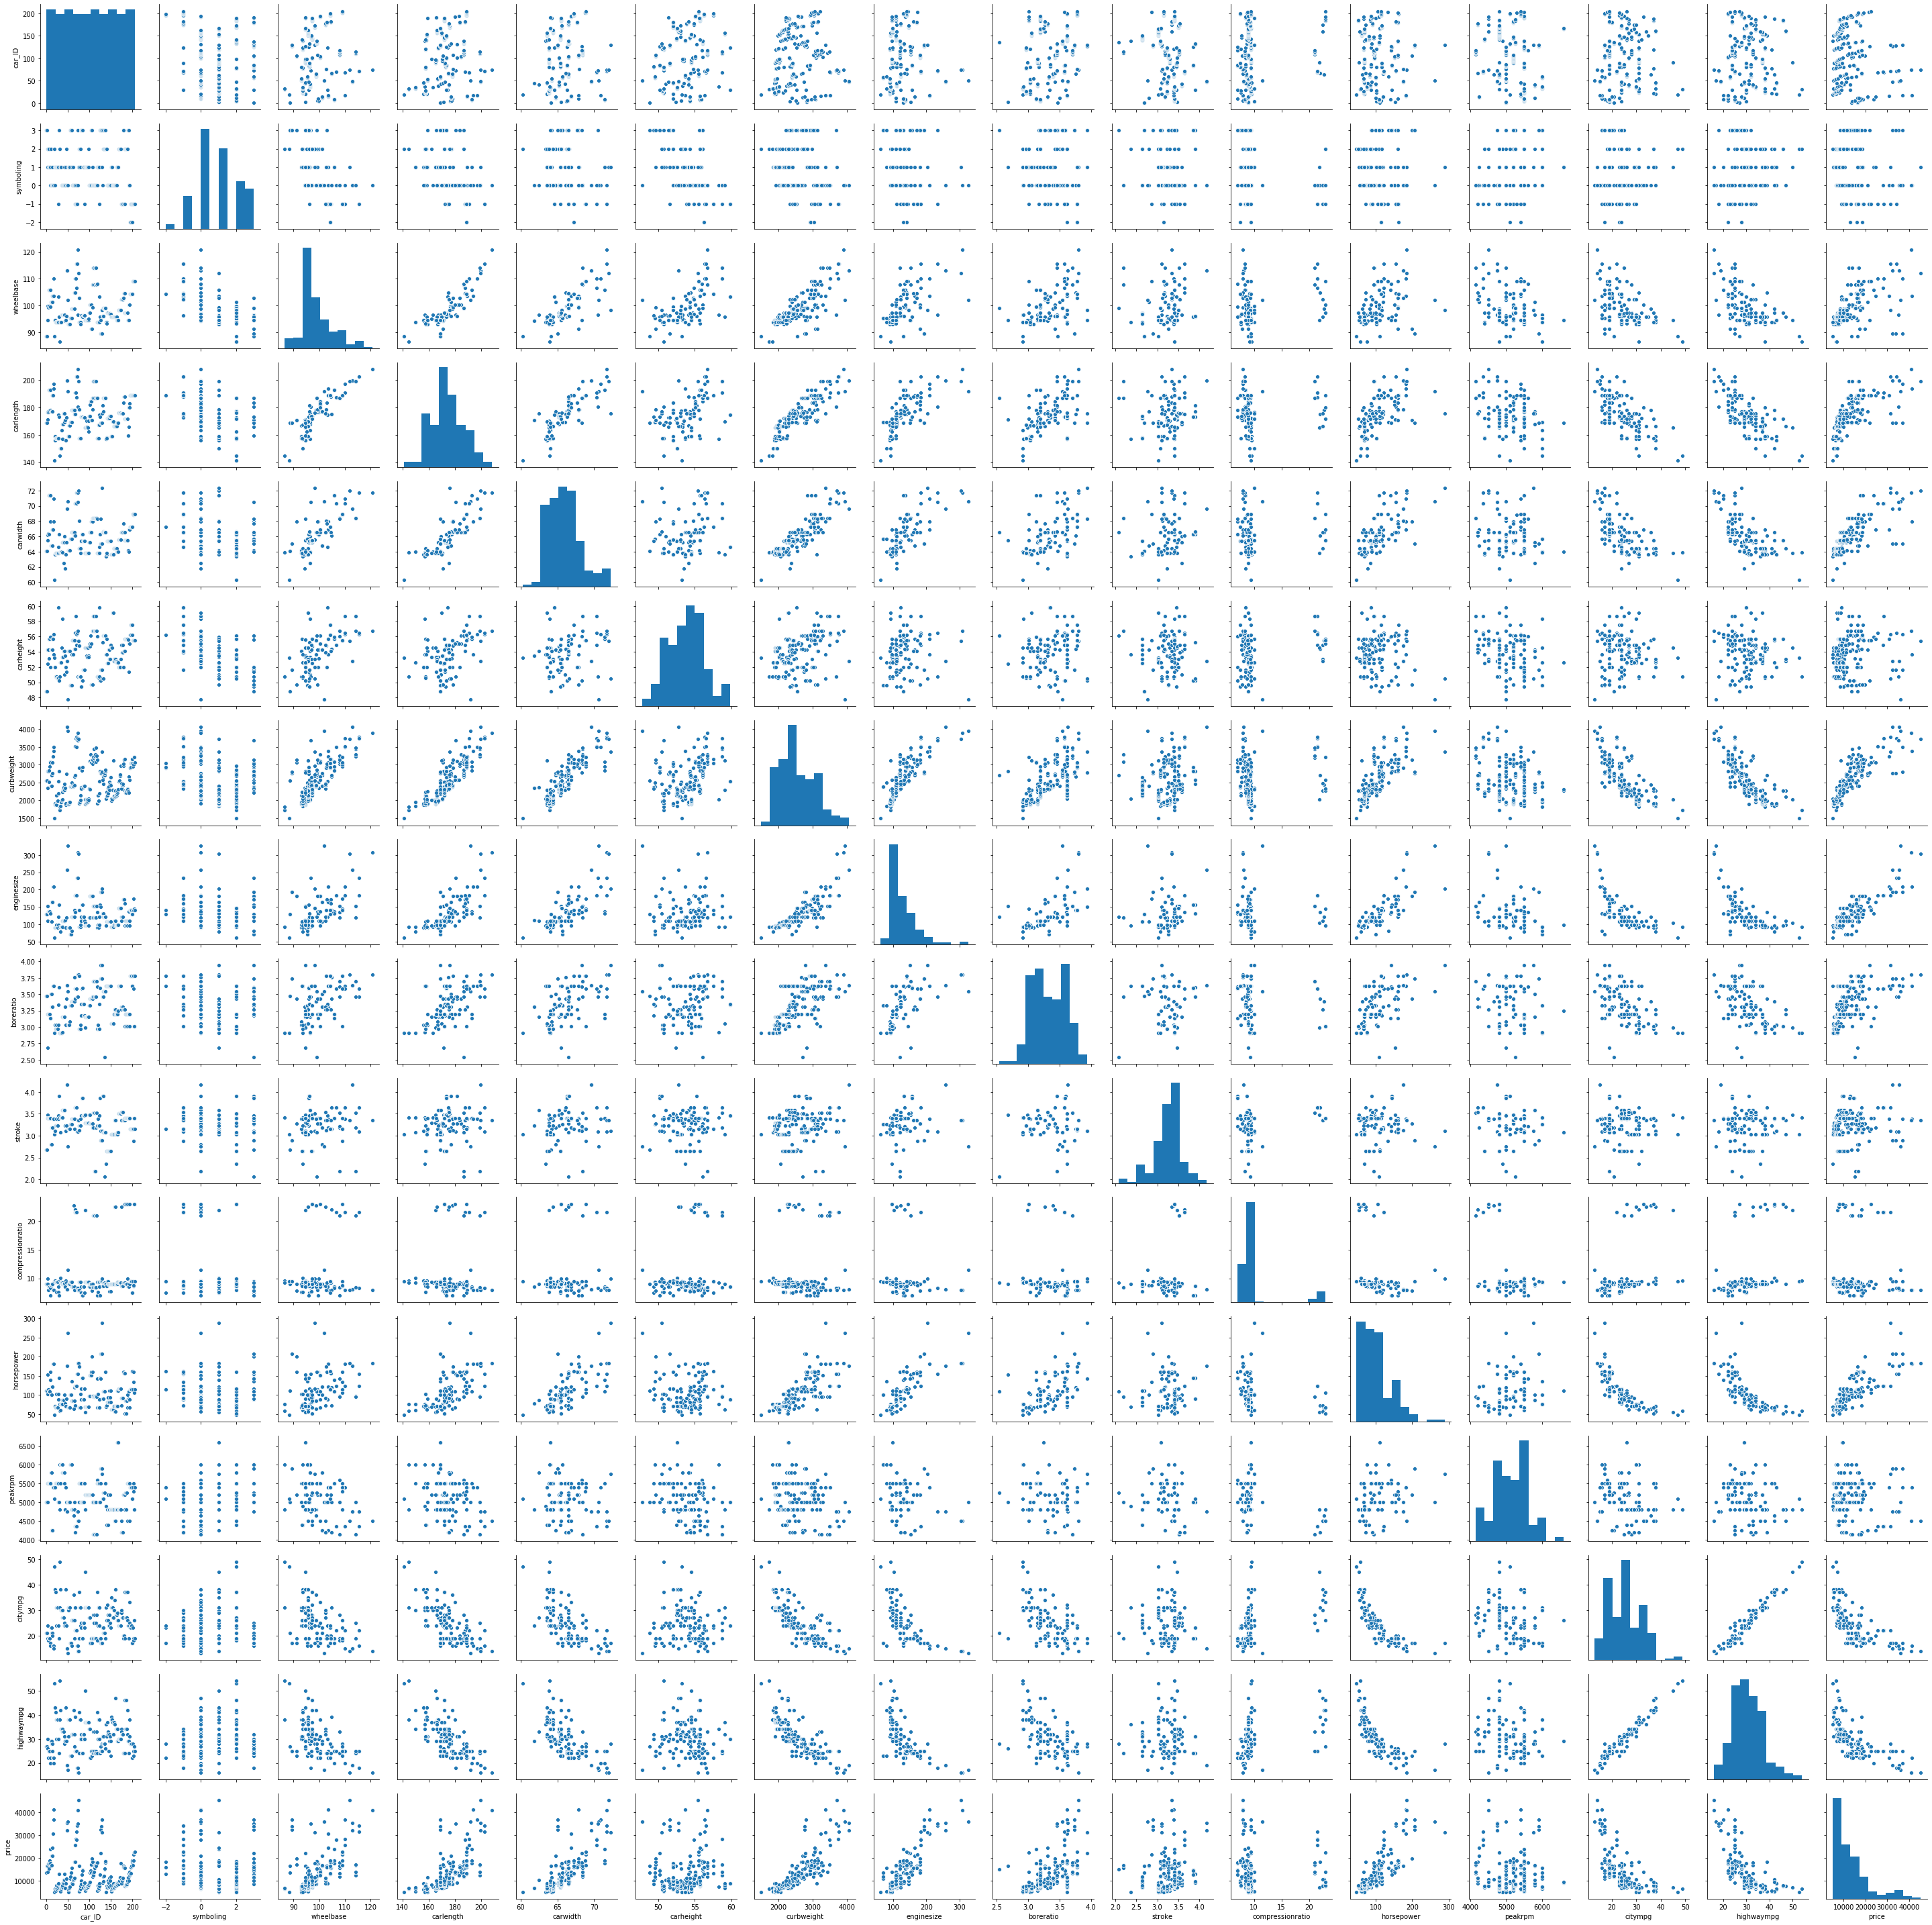

In [22]:
plt.figure(figsize = (30, 40)) 
sns.pairplot(cars)
plt.show()

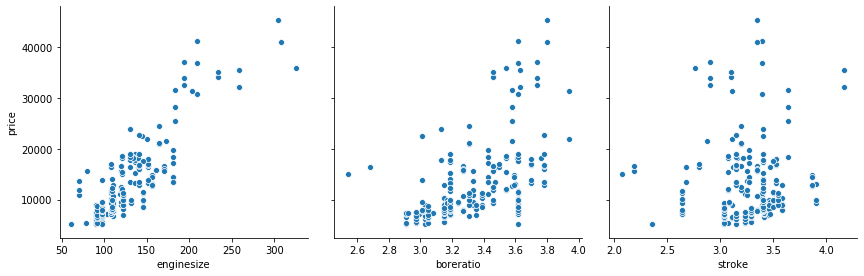

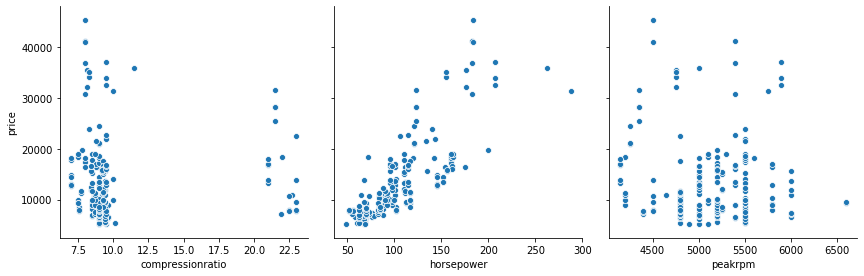

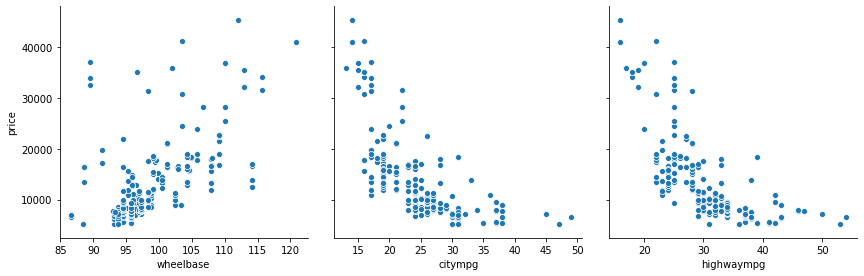

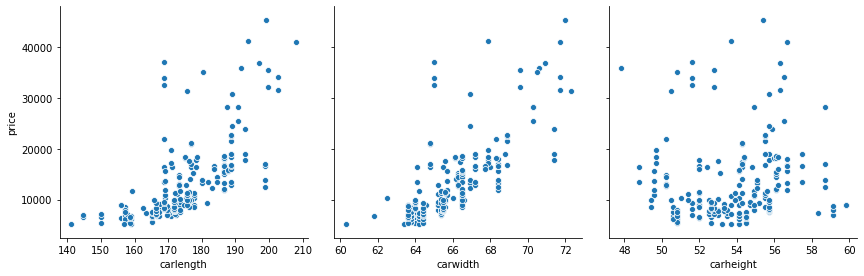

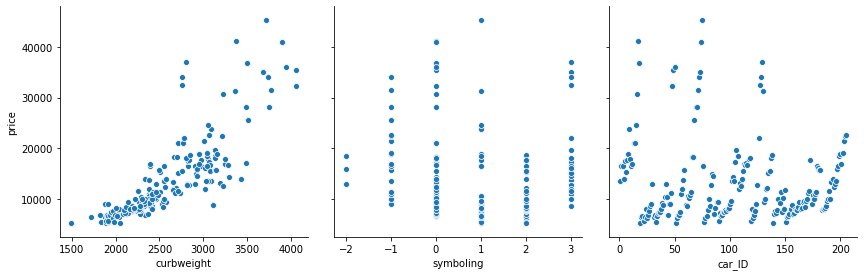

In [23]:
#Scatter Plot of all the Numeric Variables with the output variable 'price'

def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')
pp('carlength', 'carwidth', 'carheight')
pp('curbweight','symboling','car_ID')

Observations: 
    
    1. enginesize, boreratio, horsepower, wheelbase, curbweight, carwidth, carlength - seem to have a significant positive correlation with price.
    2. citympg, highwaympg - seem to have a significant negative correlation with price.
    2. carheight, car_ID, peakrpm, compressionratio - no significant trend is seen

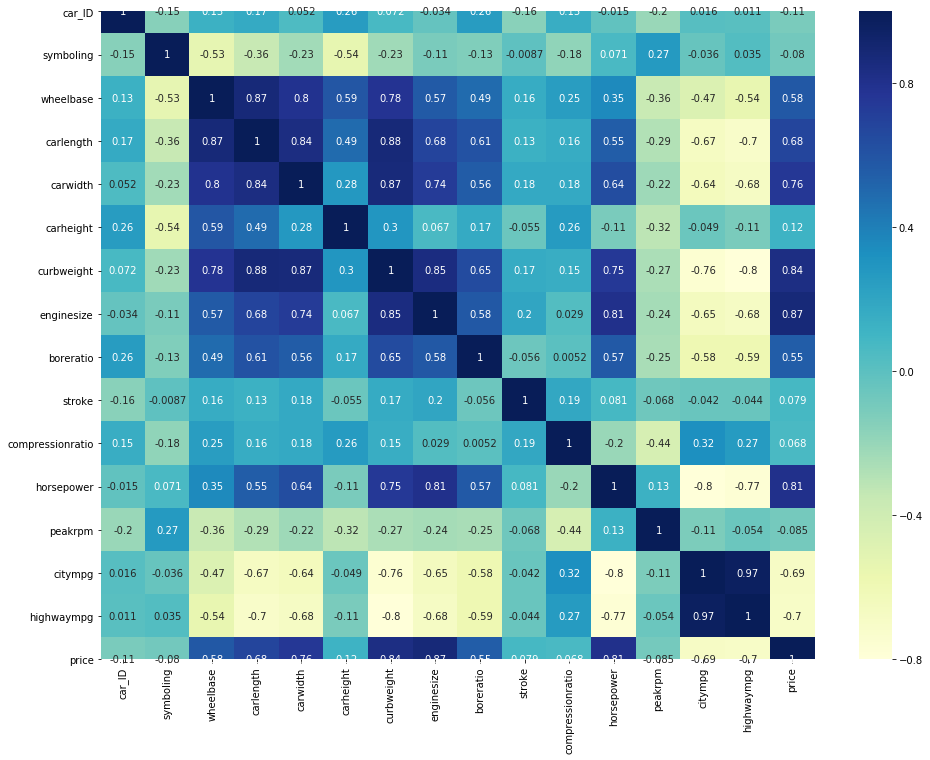

In [24]:
plt.figure(figsize = (16, 15))  
sns.heatmap(cars.corr(),annot = True, cmap="YlGnBu")
plt.subplots_adjust(bottom=0.28)
plt.show()

Observation: The heatmap helps to find the correlations with the target variable 'price' of different numneric variable.
    
The following features are positively correlated to the target variable'price':
- wheelbase,
- carlength,
- carwidth,
- curbweight,
- enginesize,
- boreratio,
- horsepower

However, there are also a few variables showing a negative relationship with price variable like,
- citympg,
- highwaympg

**Visualising Categorical Variables :**

In [25]:
#Finding the categorical variables in Cars Dataset:
cars.columns[cars.dtypes == 'object']

Index(['CarCompany', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

Observation: We see 10 categorical variables as listed above in the Cars Dataset. To understand the behavious of each of the variables we create boxplot of each with the output 'price'(our target variable).

Symboling is a categorical variable which has been treated as a numeric int64 type variable. So we need to convert the symboling variable. Symboling is the assigned insurance risk rating. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

In [26]:
# Here we convert 'symboling' to categorical variable by denoting as below:
# 1.  -ve symboling(-2,-1) - safe
# 2.  0, 1 - moderate
# 3.  2,3 - risky

cars['symboling'] = cars['symboling'].map(
    {-2: 'safe',-1: 'safe',
     0: 'moderate',1: 'moderate',
     2: 'risky',3:'risky'})

In [27]:
cars.columns[cars.dtypes == 'object']

Index(['symboling', 'CarCompany', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [28]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null object
CarCompany          205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm     

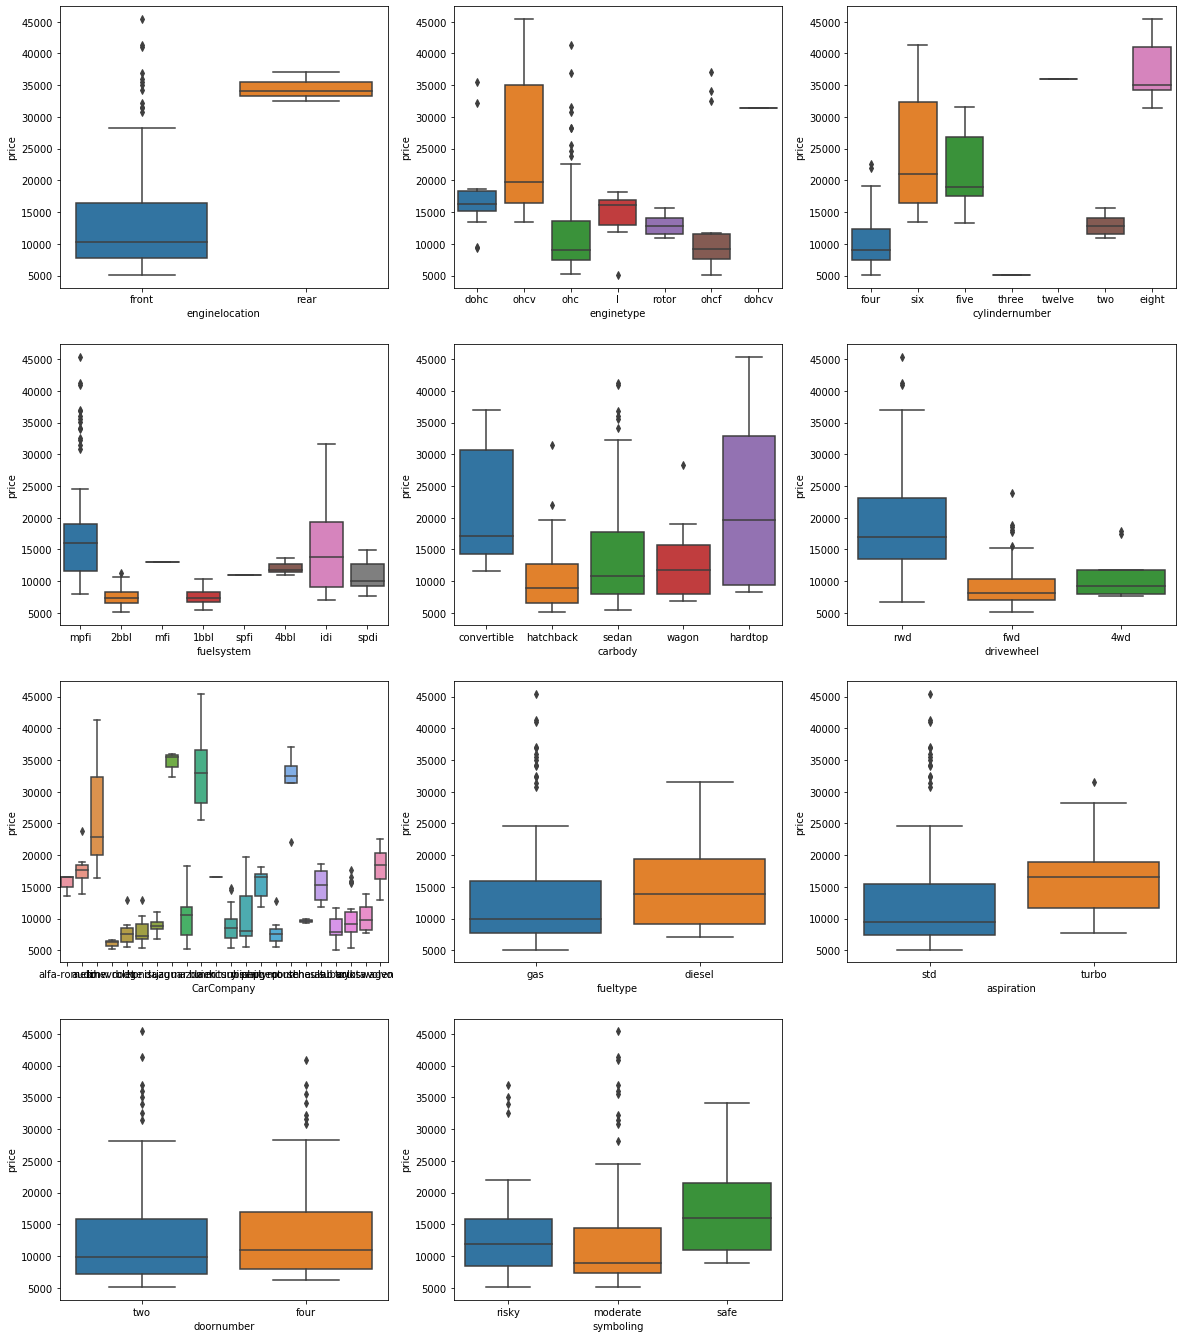

In [29]:
#Creating boxplot of each categorical variable
plt.figure(figsize=(20, 30))
plt.subplot(5,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.subplot(5,3,2)
sns.boxplot(x = 'enginetype', y = 'price', data = cars)
plt.subplot(5,3,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars)
plt.subplot(5,3,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars)
plt.subplot(5,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.subplot(5,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars)
plt.subplot(5,3,7)
sns.boxplot(x = 'CarCompany', y = 'price', data = cars)
plt.subplot(5,3,8)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(5,3,9)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(5,3,10)
sns.boxplot(x = 'doornumber', y = 'price', data = cars)
plt.subplot(5,3,11)
sns.boxplot(x = 'symboling', y = 'price', data = cars)
plt.show()

Observations from boxplot of Categorical Variables: 

    -  The expensive cars have 'enginelocation' at rear as seen in the plot above
    -  The cars with 'enginetype' as ohcv are the expensive one.
    -  The price of car is seen to be directly proportional with the number of cylinders.   
    -  The idi & mpfi fuelsystem cars are seen to be more expensive than the others.
    -  Hardtop & convertible covers are expensive as compared to the other carbody types.
    -  *rwd* 'drivewheel' is more expensive than fwd and 4wd.
    -  Cars with 'fueltype' as diesel are more expensive than the ones with gas fueltype.
    -  The price of turbo 'aspiration' is more than the 'std' aspiration type.
    - 'doornumber' variable does not seem to affect the 'price' much.
    -  Based on the categorical variable 'symboling' we can say that, The price of the 'safe' cars are more compared to the risky & moderately riskly ones as can be seen from the plot. 
    
  ** The plot of price with Car Company is not clear, so the below plot is created

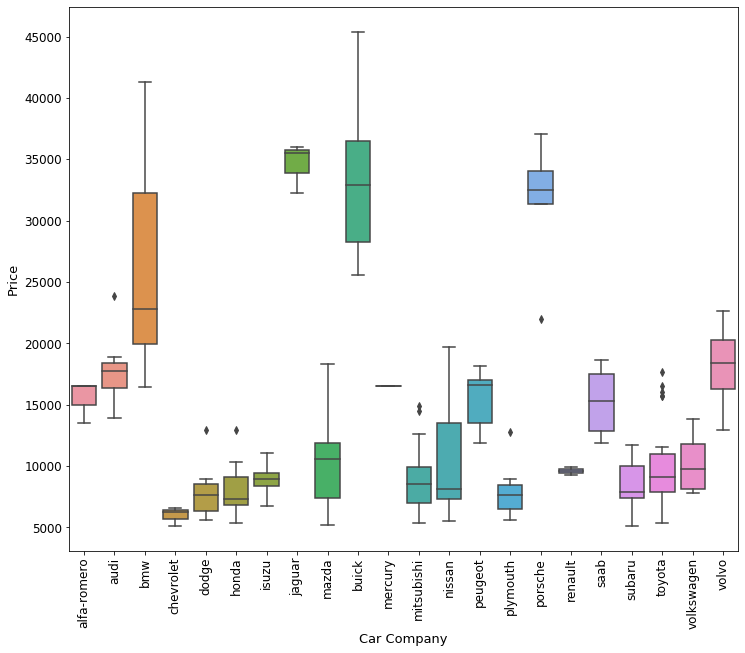

Average US car price:  13276.710570731706
CarCompany
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
Name: price, dtype: float64


In [30]:
plt.figure(figsize=(12, 10))
sns.boxplot(x = 'CarCompany', y = 'price', data = cars)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Car Company', fontsize=13)
plt.ylabel('Price', fontsize=13)
plt.show()

print('Average US car price: ',cars['price'].mean())
print(cars.groupby('CarCompany').price.mean().sort_values(ascending=False).head(15))

Observation : 
- The expensive car companies are - jaguar, buick, porsche, bmw, volvo, audi.
- The average car price in US is calculated to be $13276.70.
- The range of price for cars each company cars is seen in the plot.
- Some outliers are seen for some car companies, which means that these companies(audi, dodge, honda, isuzu, mitsubishi, toyota,plymouth) manufacture some expensive cars.
- So we can say that the company name or in other words the brand of the car shows some affect on the price.

In [31]:
categorical_variables = list(cars.columns[cars.dtypes == 'object'])
categorical_variables

['symboling',
 'CarCompany',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

**Derived Metrics** : Plotting how different categorical variables vary with the Average Price 

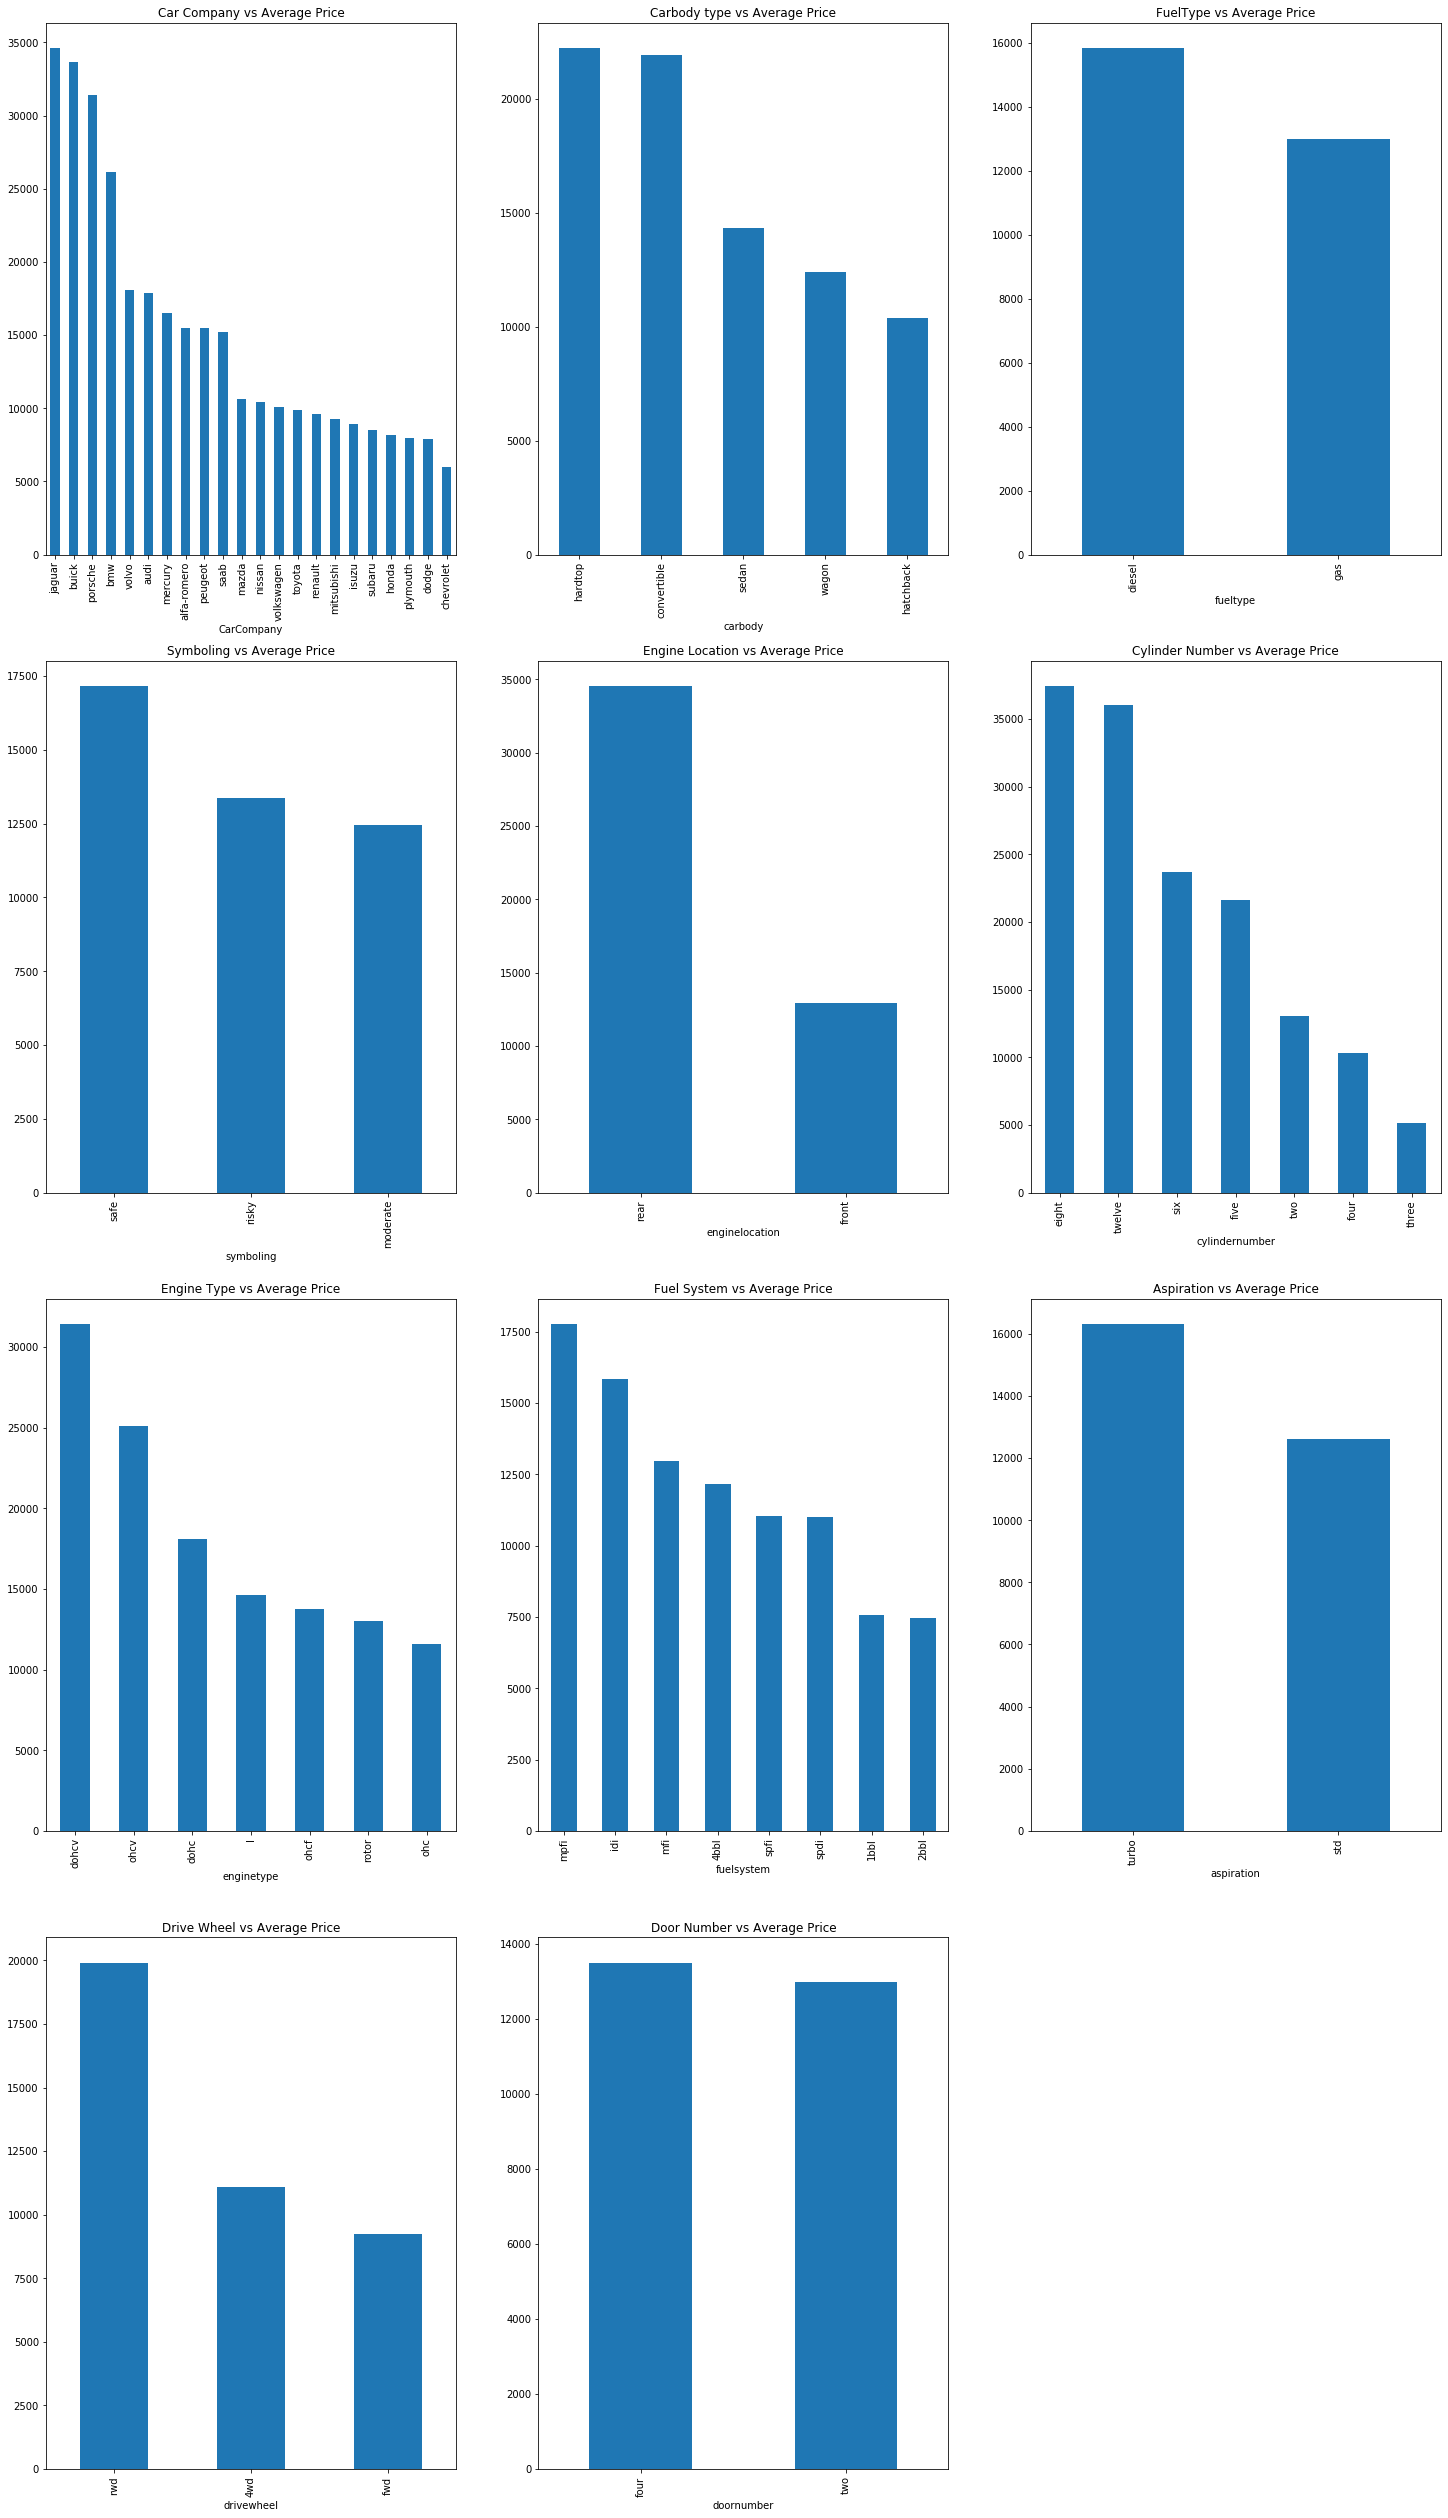

In [32]:
plt.figure(figsize=(25, 45))

plt.subplot(4,3,1)
(cars.groupby(['CarCompany'])['price'].mean().sort_values(ascending = False)).plot.bar()
plt.title('Car Company vs Average Price')

plt.subplot(4,3,2)
(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False)).plot.bar()
plt.title('Carbody type vs Average Price')

plt.subplot(4,3,3)
(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False)).plot.bar()
plt.title('FuelType vs Average Price')

plt.subplot(4,3,4)
(cars.groupby(['symboling'])['price'].mean().sort_values(ascending = False)).plot.bar()
plt.title('Symboling vs Average Price')

plt.subplot(4,3,5)
(cars.groupby(['enginelocation'])['price'].mean().sort_values(ascending = False)).plot.bar()
plt.title('Engine Location vs Average Price')

plt.subplot(4,3,6)
(cars.groupby(['cylindernumber'])['price'].mean().sort_values(ascending = False)).plot.bar()
plt.title('Cylinder Number vs Average Price')

plt.subplot(4,3,7)
(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False)).plot.bar()
plt.title('Engine Type vs Average Price')

plt.subplot(4,3,8)
(cars.groupby(['fuelsystem'])['price'].mean().sort_values(ascending = False)).plot.bar()
plt.title('Fuel System vs Average Price')

plt.subplot(4,3,9)
(cars.groupby(['aspiration'])['price'].mean().sort_values(ascending = False)).plot.bar()
plt.title('Aspiration vs Average Price')

plt.subplot(4,3,10)
(cars.groupby(['drivewheel'])['price'].mean().sort_values(ascending = False)).plot.bar()
plt.title('Drive Wheel vs Average Price')

plt.subplot(4,3,11)
(cars.groupby(['doornumber'])['price'].mean().sort_values(ascending = False)).plot.bar()
plt.title('Door Number vs Average Price')

plt.show()

Observations:

- The average price of the cars of the company 'jaguar' is the highest.
- The average price of carbody type as 'hardtop' & 'convertible' is seen to be the highest.
- Diesel fueltype cars have the highest average price.
- The cars rated -ve in Symboling which are considered as 'safe' are seen to have a high average price.
- The cars with 'rear' engine location seems to be more expensive.
- The cars with cylinder numbers 8 & 12 are seen to have a high average price.
- Cars with engine type as 'dohcv' & 'ohcv' have the highest avg price.
- 'mpfi' fuelsystem based cars are seen to have a high average price.
- 'turbo' aspiration is highly priced than the std aspiration.
- 'rwd' drivewheel is seen to have the highest average price.
- 'doornumber' with four is slightly priced higher than two. We can consider 'doornumber' as having almost no impact to our analysis.

In [33]:
#Binning the Car Companies based on avg prices of each car Company using groupby and merge functions
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
t = temp.groupby(['CarCompany'])['price'].mean()
temp = temp.merge(t.reset_index(), how='left',on='CarCompany')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
cars['Cars_Category'] = pd.cut(temp['price_y'],bins,right=False,labels=label)
cars.head()

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,1,risky,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium_Range
1,2,risky,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium_Range
2,3,moderate,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium_Range
3,4,risky,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium_Range
4,5,risky,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium_Range


In [34]:
cars.groupby('CarCompany').price.mean().sort_values(ascending=False)

CarCompany
jaguar         34600.000000
buick          33647.000000
porsche        31400.400000
bmw            26118.750000
volvo          18063.181818
audi           17859.142857
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.250000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [35]:
car_segment_dict = {
    'cheverolet' : 'Budget_Friendly',
    'dodge' : 'Budget_Friendly',
    'plymouth' : 'Budget_Friendly',
    'honda' : 'Budget_Friendly',
    'subaru' : 'Budget_Friendly',
    'isuzu' : 'Budget_Friendly',
    'mitsubishi' : 'Budget_Friendly',
    'renault' : 'Budget_Friendly',
    'toyota' : 'Budget_Friendly',
    'volkswagen' : 'Medium_Range',
    'nissan' : 'Medium_Range',
    'mazda' : 'Medium_Range',
    'saab' : 'Medium_Range',
    'peugeot' : 'Medium_Range',
    'alfa-romero' : 'Medium_Range',
    'mercury' : 'Medium_Range',
    'audi' : 'Medium_Range',
    'volvo' : 'Medium_Range',
    'bmw' : 'TopNotch_Cars',
    'buick' : 'TopNotch_Cars',
    'porsche' : 'TopNotch_Cars',
    'jaguar' : 'TopNotch_Cars',
    }
cars['car_segment_type'] = cars['CarCompany'].map(car_segment_dict)
# Dropping the orignal car_company variable
cars.drop('CarCompany',axis=1,inplace=True)
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category,car_segment_type
0,1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,Medium_Range,Medium_Range
1,2,risky,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,Medium_Range,Medium_Range
2,3,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,Medium_Range,Medium_Range
3,4,risky,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,Medium_Range,Medium_Range
4,5,risky,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,Medium_Range,Medium_Range


**Significant variables after Data Visualization**
We find the following variables can be considered as significant after observing all the visualizations
- Car Company, 
- Car_Category(derived variable),
- Engine Type, 
- Fuel Type, 
- Car Body,
- Aspiration, 
- Cylinder Number, 
- Drive wheel, 
- Curb weight, 
- Car Length, 
- Car width, 
- Engine Size, 
- Boreratio, 
- Horse Power, 
- Wheelbase, 
- citympg, 
- highwaympg

## Step 3 : DATA PREPARATION 

### Dealing with Categorical Variables

**We need to convert all the categorical fields of two levels to binary.**

In [36]:
# Converting the levels to 0 and 1.
cars['fueltype'] = cars['fueltype'].map({'gas': 1, 'diesel': 0})
cars['aspiration'] = cars['aspiration'].map({'std': 1, 'turbo': 0})
cars['doornumber'] = cars['doornumber'].map({'two': 1, 'four': 0})
cars['enginelocation'] = cars['enginelocation'].map({'front': 1, 'rear': 0})

**Dummy Variables:** -  We need to generate dummy values for categorical columns of more than 2 levels. Hence the remaining Categorical Variables are converted into Numerical Variables with the help of Dummy Variables

In [37]:
cars.columns[cars.dtypes == 'object']

Index(['symboling', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber',
       'fuelsystem', 'car_segment_type'],
      dtype='object')

In [38]:
# unique values for symboling
print("Unique values in symboling : ", cars['symboling'].unique())
# unique values for carbody
print("Unique values in carbody : ", cars['carbody'].unique())
# unique values for drivewheel
print("Unique values in drivewheel : ", cars['drivewheel'].unique())
# unique values for enginetype
print("Unique values in enginetype : ", cars['enginetype'].unique())
# unique values for cylindernumber
print("Unique values in cylindernumber : ", cars['cylindernumber'].unique())
# unique values for fuelsystem
print("Unique values in fuelsystem : ", cars['fuelsystem'].unique())
#unique values in car_segment_types
print("Unique values in Car Company : ", cars['car_segment_type'].unique())

Unique values in symboling :  ['risky' 'moderate' 'safe']
Unique values in carbody :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Unique values in drivewheel :  ['rwd' 'fwd' '4wd']
Unique values in enginetype :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Unique values in cylindernumber :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Unique values in fuelsystem :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Unique values in Car Company :  ['Medium_Range' 'TopNotch_Cars' nan 'Budget_Friendly']


In [39]:
#Generating Dummy Values
cars = pd.get_dummies(cars, columns=['drivewheel','carbody', 'enginetype', 'cylindernumber', 'fuelsystem','car_segment_type','symboling'])
cars.head()

,car_ID,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_segment_type_Budget_Friendly,car_segment_type_Medium_Range,car_segment_type_TopNotch_Cars,symboling_moderate,symboling_risky,symboling_safe
0,1,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,1,0,0,1,0
1,2,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,1,0,0,1,0
2,3,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,1,0,1,0,0
3,4,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,0,1,0,0,1,0
4,5,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,1,0,0,1,0


In [40]:
cars.shape

(205, 56)

In [41]:
cars.head()

,car_ID,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_segment_type_Budget_Friendly,car_segment_type_Medium_Range,car_segment_type_TopNotch_Cars,symboling_moderate,symboling_risky,symboling_safe
0,1,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,1,0,0,1,0
1,2,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,1,0,0,1,0
2,3,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,1,0,1,0,0
3,4,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,0,1,0,0,1,0
4,5,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,1,0,0,1,0


In [42]:
#we can drop the car_ID variable which is not relevent for the price modeling
cars.drop('car_ID',axis=1,inplace=True)


Now as we did not use the default drop_first option in get_dummies method,we need to drop that dummy variabe which is least related to price ,
- for carbody variable from EDA - the category hatchback seems to be the least related to price.
- for fuelsystem variable, from EDA - the category '1bbl' seems to be the least related to price.
- the reason we are dropping 'drivewheel_4wd' from the drive wheel category(though it looks like it is the most common preffered) is that it has a reducing effect on the price.
- engine type rotor category has the least effect on the price. 
- cylindernumber_three category has the least effect on the price.
- also we are dropping 'symboling_risky' & 'car_segment_type_Budget_Friendly' columns.

In [43]:
cars.drop(labels = ['carbody_hatchback'], axis = 1, inplace = True)
cars.drop(labels = ['fuelsystem_1bbl'], axis = 1, inplace = True)
cars.drop(labels = ['drivewheel_4wd'], axis = 1, inplace = True)
cars.drop(labels = ['enginetype_rotor'], axis = 1, inplace = True)
cars.drop(labels = ['cylindernumber_three'], axis = 1, inplace = True)
cars.drop(labels = ['symboling_risky'], axis = 1, inplace = True)
cars.drop(labels = ['car_segment_type_Budget_Friendly'], axis = 1, inplace = True)

print(cars.columns)
print(cars.shape)

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'Cars_Category', 'drivewheel_fwd',
       'drivewheel_rwd', 'carbody_convertible', 'carbody_hardtop',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'car_segment_type_Medium_Range',
       'car_segment_type_TopNotch_Cars', 'symboling_moderate',
       'symboling_safe'],
      dtype='object')
(205, 48)


In [44]:
#Since we have created the dummy variable for Cars_Category column, we are dropping it.
cars.drop('Cars_Category',axis=1,inplace=True)

### Dealing with Numerical Variables

From the correlations heatmap we have seen earlier that:

- The following features are positively correlated to the target variable'price':
    wheelbase,
    carlength,
    carwidth,
    curbweight,
    enginesize,
    boreratio,
    horsepower
    
- However, there are also a few variables showing a negative relationship with price variable like,
    citympg,
    highwaympg
    
- In order to reduce the multicolinearity among the variables ,some of these columns can be safely dropped leaving the columns that is strongly correlated to 'price'.

    1. carlength is highly correlated with carwidth. (corr = 0.84)
    2. carlength is highly correlated with wheelbase. (corr = 0.87)
    3. carwidth is highly correlated with curbweight. (corr = 0.87)
    4. crubweight is highly correlated with horsepower. (corr = 0.75)
    5. horsepower is highly correlated with enginesize. (corr = 0.81)
    6. highwaympg is highly correlated with citympg. (corr = 0.97)

- We will be dropping columns ['carwidth', 'carlength', 'highwaympg', 'citympg']. Since 'carwidth', 'carlength'  are strongly correlated to 'curbweight' we drop these. But as 'curbweight' is highly correlated to price, we will keep it.

- 'highwaympg', 'citympg' is that they both are very highly correlated to each other but have a very low correlation with price, so we need to drop these 2.

In [45]:
cars.drop(labels=['carwidth', 'carlength', 'highwaympg', 'citympg'], axis = 1, inplace=True)

# lets have a look at the final data before proceeding with the model building.
cars.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_segment_type_Medium_Range,car_segment_type_TopNotch_Cars,symboling_moderate,symboling_safe
0,1,1,1,1,88.6,48.8,2548,130,3.47,2.68,...,0,0,0,1,0,0,1,0,0,0
1,1,1,1,1,88.6,48.8,2548,130,3.47,2.68,...,0,0,0,1,0,0,1,0,0,0
2,1,1,1,1,94.5,52.4,2823,152,2.68,3.47,...,0,0,0,1,0,0,1,0,1,0
3,1,1,0,1,99.8,54.3,2337,109,3.19,3.40,...,0,0,0,1,0,0,1,0,0,0
4,1,1,0,1,99.4,54.3,2824,136,3.19,3.40,...,0,0,0,1,0,0,1,0,0,0


## Step 4 : Model Building

We proceed for building the model using a mix approach. Initially using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn) and then use the Statmodel for statistics analysis of the model

#### 1- Splitting the Data into Training and Testing sets

In [46]:
#Here the data is divided into 70/30 % to train and test data respectively.
np.random.seed(0)
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

#### 2- Rescaling the Features using MinMax scaling

There are 2 types of scaling : Standardisation & MinMax Scaling. For our analysis, we have considered Min-Max scaling. MinMaxScaler scales all the numeric variables in the same scale between 0 and 1.

In [47]:
scaler = MinMaxScaler()

In [48]:
# The scaler() is applied to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['carheight', 'enginesize','wheelbase', 'curbweight', 'horsepower', 'boreratio' ,'stroke',
            'compressionratio', 'peakrpm', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_segment_type_Medium_Range,car_segment_type_TopNotch_Cars,symboling_moderate,symboling_safe
122,1,1,0,1,0.244828,0.265487,0.272692,0.139623,0.230159,0.525253,...,0,0,0,0,0,0,0,0,1,0
125,1,1,1,1,0.272414,0.212389,0.500388,0.339623,1.000000,0.464646,...,0,0,0,1,0,0,0,1,0,0
166,1,1,1,1,0.272414,0.424779,0.314973,0.139623,0.444444,0.449495,...,0,0,0,1,0,0,0,0,1,0
1,1,1,1,1,0.068966,0.088496,0.411171,0.260377,0.626984,0.247475,...,0,0,0,1,0,0,1,0,0,0
199,1,0,0,1,0.610345,0.858407,0.647401,0.260377,0.746032,0.484848,...,0,0,0,1,0,0,1,0,0,1


In [49]:
df_train.columns
print(df_train.shape)

(143, 43)


In [50]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_segment_type_Medium_Range,car_segment_type_TopNotch_Cars,symboling_moderate,symboling_safe
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.440559,0.993007,0.411141,0.509004,0.407878,0.241351,0.497946,0.535389,...,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.412587,0.118881,0.650350,0.104895
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.215378,0.211269,0.154619,0.207140,0.157843,...,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.494030,0.324786,0.478536,0.307495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.353982,0.245539,0.135849,0.305556,0.464646,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.341379,0.522124,0.355702,0.184906,0.500000,0.545455,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.668142,0.559542,0.301887,0.682540,0.611111,...,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 43 columns):
fueltype                          143 non-null int64
aspiration                        143 non-null int64
doornumber                        143 non-null int64
enginelocation                    143 non-null int64
wheelbase                         143 non-null float64
carheight                         143 non-null float64
curbweight                        143 non-null float64
enginesize                        143 non-null float64
boreratio                         143 non-null float64
stroke                            143 non-null float64
compressionratio                  143 non-null float64
horsepower                        143 non-null float64
peakrpm                           143 non-null float64
price                             143 non-null float64
drivewheel_fwd                    143 non-null uint8
drivewheel_rwd                    143 non-null uint8
carbody_convertible        

#### 3- Dividing into X and Y sets for the model building

In [52]:
y_train = df_train.pop('price')
X_train = df_train

#### 4- RFE(Recursive Feature Elimination)

In [53]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) 

# running RFE
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 10),
 ('aspiration', False, 7),
 ('doornumber', False, 20),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carheight', False, 11),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 4),
 ('drivewheel_fwd', False, 19),
 ('drivewheel_rwd', False, 24),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 15),
 ('carbody_sedan', False, 23),
 ('carbody_wagon', False, 16),
 ('enginetype_dohc', False, 22),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 25),
 ('enginetype_ohc', False, 3),
 ('enginetype_ohcf', False, 5),
 ('enginetype_ohcv', False, 9),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', False, 2),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 13),
 ('fuelsystem_2bbl', False, 18),
 ('fuelsystem_4bbl', Fals

In [55]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'carbody_convertible',
       'enginetype_dohcv', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve',
       'car_segment_type_TopNotch_Cars'],
      dtype='object')

In [56]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'carheight', 'peakrpm',
       'drivewheel_fwd', 'drivewheel_rwd', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_segment_type_Medium_Range',
       'symboling_moderate', 'symboling_safe'],
      dtype='object')

###### We define 2 UDF(User Defined Function) to build a linear model and calculate VIF

In [57]:
# Function to apply stats model to the given data & returning the built 'linear_model'.
def applyStatsModel(data):
    # Adding a constant variable 
    X_train_linear_model = sm.add_constant(data)    
    # Run the linear model
    linear_model = sm.OLS(y_train, X_train_linear_model).fit()   
    return linear_model


# Function to Calculate the Variance inflation factor for the given data on which stats model has been applied.
def calculateVIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns   
    # Calculate the vif factors for all the features.
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#### 5- Building model using statsmodel, for the detailed statistics

We will build our first model using the variables that rfe supported above.

In [58]:
# Lets now create a data set only with RFE supported columns.
X_train_1 = X_train[col]

# Run the linear model
stats_model_1 = applyStatsModel(X_train_1)

#Stats Summary of Model 1
print(stats_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     118.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.95e-67
Time:                        20:15:42   Log-Likelihood:                 210.47
No. Observations:                 143   AIC:                            -388.9
Df Residuals:                     127   BIC:                            -341.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Observation : cylindernumber_eight has a very high p-value of 0.648 which is very high than the permissible p-value limit i.e 0.05.

In [59]:
# Calculate the VIF for Model 1
vif_val_1 = calculateVIF(X_train_1)

# VIF values for Model 1
vif_val_1

,Features,VIF
2,curbweight,70.75
3,enginesize,66.63
0,enginelocation,41.82
5,stroke,30.20
7,horsepower,26.77
1,wheelbase,25.98
4,boreratio,25.92
11,cylindernumber_four,11.38
12,cylindernumber_six,5.97
13,cylindernumber_twelve,4.24


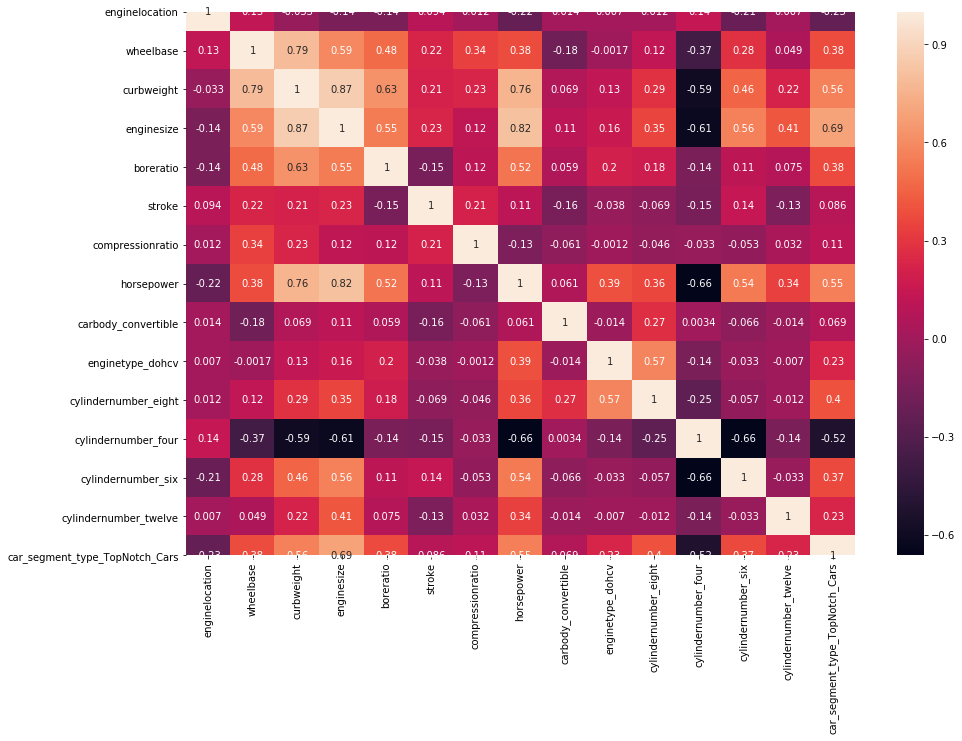

In [60]:
#Checking correlation between different variables in our Linear Model - Model 1 of X_train_1
plt.figure(figsize = (15,10))  
sns.heatmap(X_train_1.corr(),annot = True)

We proceed to create our new model by dropping "cylindernumber_eight", since it has a very high p-value.

In [61]:
X_train_2 = X_train_1.drop(["cylindernumber_eight"], axis = 1)

# Run the linear model
stats_model_2 = applyStatsModel(X_train_2)

#Stats Summary of Model 2
print(stats_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     127.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.73e-68
Time:                        20:15:43   Log-Likelihood:                 210.35
No. Observations:                 143   AIC:                            -390.7
Df Residuals:                     128   BIC:                            -346.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

enginesize has the highest p-value of 0.362 as we can see in the summary.

In [62]:
# Calculating the VIFs for Model 2 & checking vif values
vif_val_2 = calculateVIF(X_train_2)

vif_val_2

,Features,VIF
2,curbweight,70.30
3,enginesize,44.73
0,enginelocation,35.12
7,horsepower,26.75
1,wheelbase,25.90
5,stroke,23.93
4,boreratio,20.88
10,cylindernumber_four,11.11
11,cylindernumber_six,3.83
12,cylindernumber_twelve,2.94


Since enginesize has a high p-value, it is hence insignificant to our model. So we can drop it before building the new model.

In [63]:
X_train_3 = X_train_2.drop(["enginesize"], axis = 1)

# Run the linear model for X_train_3
stats_model_3 = applyStatsModel(X_train_3)

#Stats model summary for model 3
print(stats_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     137.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           7.23e-69
Time:                        20:15:43   Log-Likelihood:                 209.88
No. Observations:                 143   AIC:                            -391.8
Df Residuals:                     129   BIC:                            -350.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

"stroke" variable is seen to have the highest p-value in the above stats summary as we can see.

In [64]:
# Calculating the VIFs for Model 3 & checking vif values
vif_val_3 = calculateVIF(X_train_3)
vif_val_3

,Features,VIF
2,curbweight,60.37
0,enginelocation,31.31
6,horsepower,26.69
1,wheelbase,25.81
3,boreratio,19.06
4,stroke,18.99
9,cylindernumber_four,11.01
5,compressionratio,2.80
10,cylindernumber_six,2.71
12,car_segment_type_TopNotch_Cars,2.00


Since stroke has a high p-value hence it is insignificant for our model. So we drop it & build a new model with the remaining variables.

In [65]:
X_train_4 = X_train_3.drop(["stroke"], axis = 1)

# Run the linear model
stats_model_4 = applyStatsModel(X_train_4)

#summary of the model 4
print(stats_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           6.93e-70
Time:                        20:15:43   Log-Likelihood:                 209.68
No. Observations:                 143   AIC:                            -393.4
Df Residuals:                     130   BIC:                            -354.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

"boreratio" is seen to have high p0value of 0.504

In [66]:
# Calculate the VIFs again for the new model
vif_val_4 = calculateVIF(X_train_4)

# Let's see the vif values
vif_val_4

,Features,VIF
2,curbweight,59.71
1,wheelbase,25.77
5,horsepower,24.11
0,enginelocation,20.29
3,boreratio,15.40
8,cylindernumber_four,10.53
9,cylindernumber_six,2.67
4,compressionratio,2.54
11,car_segment_type_TopNotch_Cars,1.97
7,enginetype_dohcv,1.75


Since boreratio has a high p-value so it is insignificant for our model. Hence we drop it & build a new model with the remaining variables.

In [67]:
X_train_5 = X_train_4.drop(["boreratio"], axis = 1)

# Run the linear model
stats_model_5 = applyStatsModel(X_train_5)

#Let's see the summary of the new linear model
print(stats_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     163.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           6.59e-71
Time:                        20:15:43   Log-Likelihood:                 209.43
No. Observations:                 143   AIC:                            -394.9
Df Residuals:                     131   BIC:                            -359.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

"cylindernumber_twelve" has a high p-value as we can see here

In [68]:
# Calculate the VIFs and vif values for model 5
vif_val_5 = calculateVIF(X_train_5)
vif_val_5

,Features,VIF
2,curbweight,56.65
1,wheelbase,25.76
4,horsepower,22.34
0,enginelocation,20.17
7,cylindernumber_four,8.52
8,cylindernumber_six,2.61
3,compressionratio,2.53
10,car_segment_type_TopNotch_Cars,1.93
6,enginetype_dohcv,1.75
9,cylindernumber_twelve,1.43


Since cylindernumber_twelve has a high p-value and thus is insignificant for our model. So we drop it & build a new model with the remaining variables.

In [69]:
X_train_6 = X_train_5.drop(["cylindernumber_twelve"], axis = 1)

# Run the linear model
stats_model_6 = applyStatsModel(X_train_6)

#Let's see the summary of the new linear model
print(stats_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     179.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           8.84e-72
Time:                        20:15:44   Log-Likelihood:                 208.76
No. Observations:                 143   AIC:                            -395.5
Df Residuals:                     132   BIC:                            -362.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Here we observe "cylindernumber_six" has a high p-value. 

In [70]:
# Calculate the VIFs &  vif values for model 6
vif_val_6 = calculateVIF(X_train_6)
vif_val_6

,Features,VIF
2,curbweight,56.25
1,wheelbase,25.61
0,enginelocation,20.13
4,horsepower,19.34
7,cylindernumber_four,8.49
3,compressionratio,2.44
8,cylindernumber_six,2.27
9,car_segment_type_TopNotch_Cars,1.89
6,enginetype_dohcv,1.55
5,carbody_convertible,1.35


In [71]:
#Dropping cylindernumber_six as it has a high p-value
X_train_7 = X_train_6.drop(["cylindernumber_six"], axis = 1)

# Run the linear model
stats_model_7 = applyStatsModel(X_train_7)

#Let's see the summary of the new linear model
print(stats_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     198.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.47e-72
Time:                        20:15:44   Log-Likelihood:                 207.80
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     133   BIC:                            -366.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [72]:
# Calculate the VIFs &  vif values for model 7
vif_val_7 = calculateVIF(X_train_7)
vif_val_7

,Features,VIF
2,curbweight,56.00
1,wheelbase,25.58
0,enginelocation,19.08
4,horsepower,18.11
7,cylindernumber_four,6.97
3,compressionratio,2.44
8,car_segment_type_TopNotch_Cars,1.89
6,enginetype_dohcv,1.41
5,carbody_convertible,1.34


- The summary stats of model 7, shows that variables enginetype_dohcv & curbweight have almost similar p-values of 0.55 and 0,57 respectively. 
- Now after trials, runs and tests by dropping either of them on the next model, it was observed that if we drop curbweight at this point ,it considerably reduces the R-squared and Adj. R-squared values. 
- Also curbweight has a higher correlation to pricenas we have seen earlier. So we will drop the enginetype_dohcv column here.

In [73]:
X_train_8 = X_train_7.drop(["enginetype_dohcv"], axis = 1)

# Run the linear model
stats_model_8 = applyStatsModel(X_train_8)

#summary of the new model 8
print(stats_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     218.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           6.04e-73
Time:                        20:15:44   Log-Likelihood:                 205.82
No. Observations:                 143   AIC:                            -393.6
Df Residuals:                     134   BIC:                            -367.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [74]:
# Calculate the VIFs &  vif values for model 8
vif_val_8 = calculateVIF(X_train_8)
vif_val_8

,Features,VIF
2,curbweight,50.88
1,wheelbase,25.29
0,enginelocation,18.86
4,horsepower,14.11
6,cylindernumber_four,6.91
3,compressionratio,2.31
7,car_segment_type_TopNotch_Cars,1.87
5,carbody_convertible,1.34


From the statistics of model 8, we observe that variable - compressionratio has a high p-value. So we drop it.

In [75]:
X_train_9 = X_train_8.drop(["compressionratio"], axis = 1)

# Run the linear model
stats_model_9 = applyStatsModel(X_train_9)

#summary of the new linear model 9
print(stats_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     244.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.29e-73
Time:                        20:15:44   Log-Likelihood:                 203.87
No. Observations:                 143   AIC:                            -391.7
Df Residuals:                     135   BIC:                            -368.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Here we can see that all the p-values are now in the allowed range. 

In [76]:
# Calculate the VIFs &  vif values for model 9
vif_val_9 = calculateVIF(X_train_9)
vif_val_9

,Features,VIF
2,curbweight,46.00
1,wheelbase,25.24
0,enginelocation,18.67
3,horsepower,11.60
5,cylindernumber_four,6.91
6,car_segment_type_TopNotch_Cars,1.86
4,carbody_convertible,1.33


From the VIF table above we see that curbweight has a very high vif value. So we drop it and re-build our model.

In [77]:
X_train_10 = X_train_9.drop(["curbweight"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_10)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#summary of the new linear model 10
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     262.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.56e-72
Time:                        20:15:44   Log-Likelihood:                 197.95
No. Observations:                 143   AIC:                            -381.9
Df Residuals:                     136   BIC:                            -361.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [78]:
# Calculate the VIFs  & vif values for model 10
vif_val_10 = calculateVIF(X_train_10)
vif_val_10

,Features,VIF
0,enginelocation,18.61
1,wheelbase,7.13
4,cylindernumber_four,6.86
2,horsepower,5.35
5,car_segment_type_TopNotch_Cars,1.84
3,carbody_convertible,1.11


- From the stats model summary of model 10, we observe that all the p-values are now in the allowed range. 
- From the VIF table above we see that enginelocation has a high vif value. So we drop it and build our model.

In [79]:
X_train_11 = X_train_10.drop(["enginelocation"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_11)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     289.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.62e-71
Time:                        20:15:44   Log-Likelihood:                 192.00
No. Observations:                 143   AIC:                            -372.0
Df Residuals:                     137   BIC:                            -354.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [80]:
# Calculate the VIFs for the new model
vif_val_11 = calculateVIF(X_train_11)

# VIF values for Model 11
vif_val_11

,Features,VIF
0,wheelbase,5.03
1,horsepower,3.84
3,cylindernumber_four,2.41
4,car_segment_type_TopNotch_Cars,1.83
2,carbody_convertible,1.09


Here we see that the VIFs are within range of 5. wheelbase variable has slightly higher VIF, but still we consider it since the value is 5.03.

#### 6- Residual Analysis of the train data

- One of the major assumptions of linear regression is - to check if the error terms are normally distributed.
- We proceed to see the distribustion of error terms by plotting a histogram of the error terms and see what it looks like.

In [81]:
X_train_linear_model.columns

Index(['const', 'wheelbase', 'horsepower', 'carbody_convertible',
       'cylindernumber_four', 'car_segment_type_TopNotch_Cars'],
      dtype='object')

In [82]:
y_train_price = linear_model.predict(X_train_linear_model)

Text(0.5, 0, 'Errors')

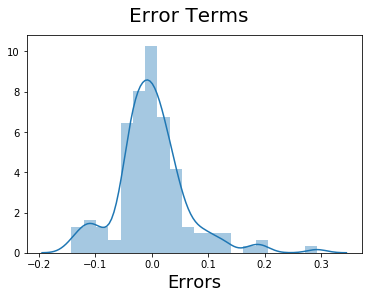

In [83]:
# Error terms distribution plot
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Observation :
- Here we can see that the error terms are normally distributed and the mean is centred around zero. Hence the Linear Regression Assumption holds true.

#### 7- Making Predictions

- In order to make any inference about the equation of the linear regression, we need to test on the test set data first.
- scaling is applied on the test sets
- We apply the transformation on the test set using 'transform' function.
- Only those variables are used which we used earlier to train the final model.

In [84]:
num_vars = ['carheight', 'enginesize','wheelbase', 'curbweight', 'horsepower', 'boreratio' ,'stroke',
            'compressionratio', 'peakrpm', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [85]:
y_test = df_test.pop('price')
X_test = df_test

In [86]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_11.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [87]:
# Making predictions
y_pred = linear_model.predict(X_test_new)

## Step 5 : Model Evaluation

Text(0, 0.5, 'y_pred')

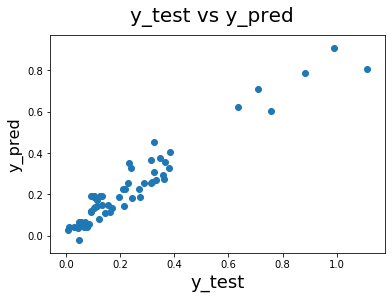

In [88]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

Observation: 
- y_test vs y_pred is observed to be almost linear with 
- Some variation is seen in the spread, but overall, it is a pretty linear spread.

Text(0, 0.5, 'ytest-ypred')

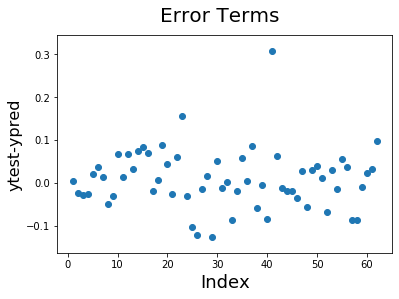

In [89]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
# plt.plot(c,y_test-y_pred_m9, color="blue", linewidth=2.5, linestyle="-")
plt.scatter(c,y_test-y_pred)

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Observation:

- From the above scatter plot, we observe that the error (y_test-y_pred) is randomly distributed,
- The spread does not follow any pattern, as there is no curve, and 
- We can see no relation which indicates that it is just the white noise.

In [90]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.06831656207976369
Model r2_score: 0.9126790124274486


In [91]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     289.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.62e-71
Time:                        20:15:44   Log-Likelihood:                 192.00
No. Observations:                 143   AIC:                            -372.0
Df Residuals:                     137   BIC:                            -354.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Inferences:** 

- The R2 score of the training set is 0.914 and the test set is 0.912 which is very much close. Hence, we can say that our model is good enough to predict Car prices with the above variables.

- R-squared and Adjusted R-squared (extent of fit) - 0.914 and 0.910 -  So clearly 91% variance can be explained.

- F-stats and Prob(F-stats) (overall model fit) - 289.6 and 5.62e-71(approx. 0.0) 

- Model fit is significant and explained 91% variance is just not by chance.

- r2_score on the test data is very close to the trained Adj. R-Squared value of the model. we have a significantly high r2_score and a low RMSE of 0.068.

- Since the p-values for all the coefficients seem to be less than the significance level of 0.05, so we can say all the predictors are statistically significant.

- With a low p-value and low VIF, the below variables do describe the price of the automobiles to a good extent.
        - wheelbase	
        - horsepower
        - cylindernumber_four
        - car_segment_type_TopNotch_Cars	
        - carbody_convertible	

Text(0, 0.5, 'Views')

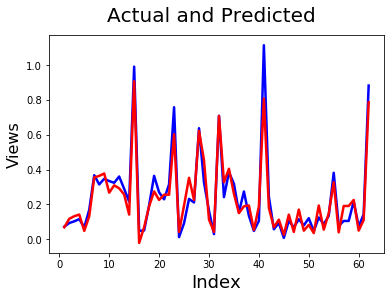

In [92]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Observations:
    
- The Actual vs Predicted Graph shows that the predicted value(y_pred) miss the actual values at some places  but given that we want to avoid overfitting. 
- Since we want our model to generalize well and perform well on unseen test data we will have to compromise a bit (bias-variance tradeoff)

# Conclusion:


### 1- The variables that are significant in predicting the price of a car: #

     1. wheelbase
     2. horsepower 
     3. carbody_convertible
     4. cylindernumber_four
     5. car_segment_type_TopNotch_Cars 


### 2- The final equation for our best fitted line for predicting price would be :

#### price = (0.3249 x wheelbase) + (0.4945 x horsepower) + (-0.0623 x cylindernumber_four) + (0.2580 x LuxuryCars) + (0.1835 x carbody_convertible) - 0.0163


*We can conclude from the final model that we have all our variables in the permissible limits and the model looks to be stable. Also we can see the error terms are also normally distributed & are independent of each other. Over 90% of variance can be explained. Overall the model looks good.Also we can see R2 score of the training set is 0.914 and the test set is 0.912 which is very much close. Hence we can use  our model to predict the price of cars.*